In [1]:
import torch
from functions import *
from pySaliencyMap import *
import torchvision.transforms
import matplotlib.pyplot as plt
from data_utils import FacePlacedData

In [6]:
model = torch.load('train_fcn_model_subepoch_18')

In [7]:
img = 'test_imgs/test2.png'
pred, out = pass_img(model, img)

imgplt = Image.open(img)
imggray = Image.open(img).convert('L')
res = transforms.Resize([240, 320])
imggray = res(imggray)
filtered_pred_pil = opening_transform(pred, 8)

keypoints, im_with_keypoints = get_blobs(img)
plt.imshow(im_with_keypoints)
faces = get_faces(img, keypoints)

RuntimeError: CUDA out of memory. Tried to allocate 27.75 MiB (GPU 0; 11.17 GiB total capacity; 1.49 GiB already allocated; 22.56 MiB free; 1.63 MiB cached)

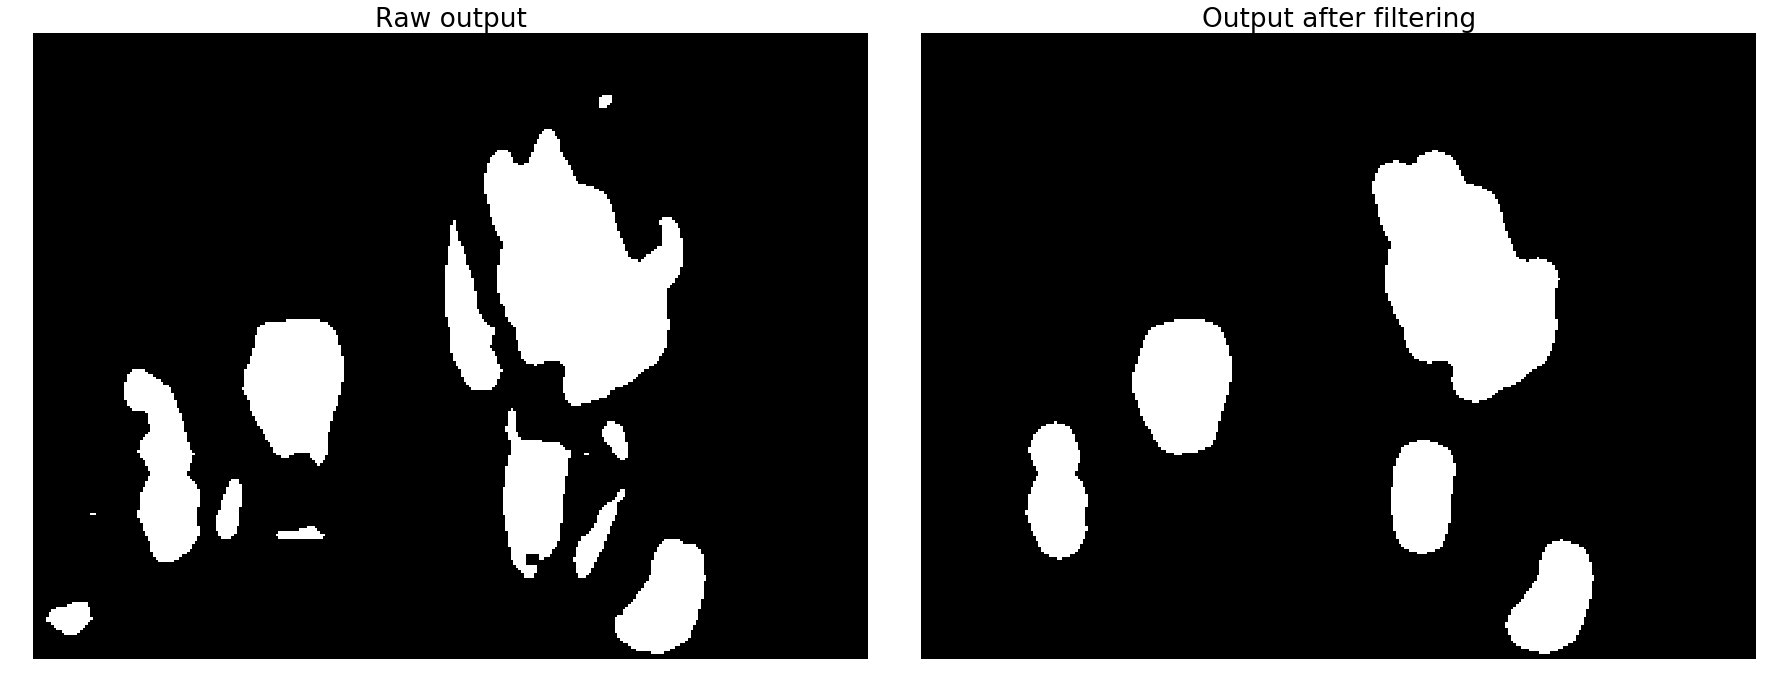

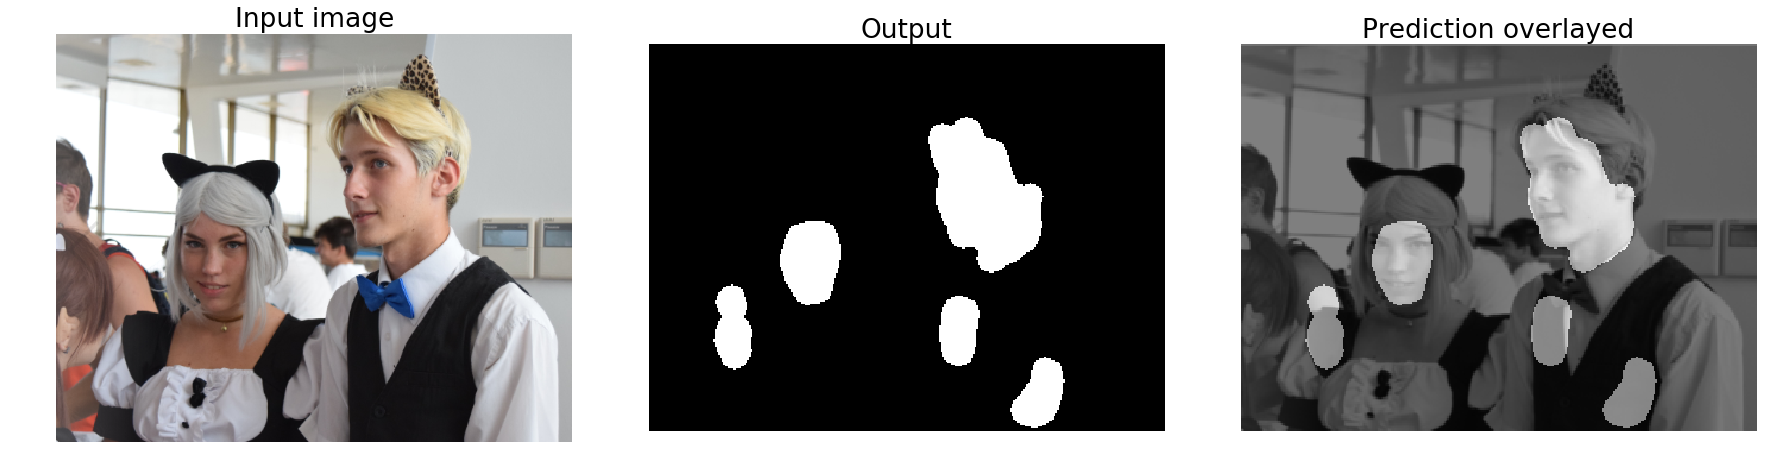

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(25, 25))
plt.rcParams.update({'font.size': 22})
ax[0].imshow(pred.cpu().numpy().squeeze(0), cmap='gray')
ax[0].axis('off')
ax[0].set_title('Raw output')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output after filtering')
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(25, 25))
ax[0].imshow(imgplt)
ax[0].axis('off')
ax[0].set_title('Input image')
ax[1].imshow(filtered_pred_pil)
ax[1].axis('off')
ax[1].set_title('Output')
ax[2].imshow(Image.blend(imggray, filtered_pred_pil, 0.5))
ax[2].axis('off')
ax[2].set_title('Prediction overlayed')
plt.tight_layout()

Text(0.5,1,'Saliency map')

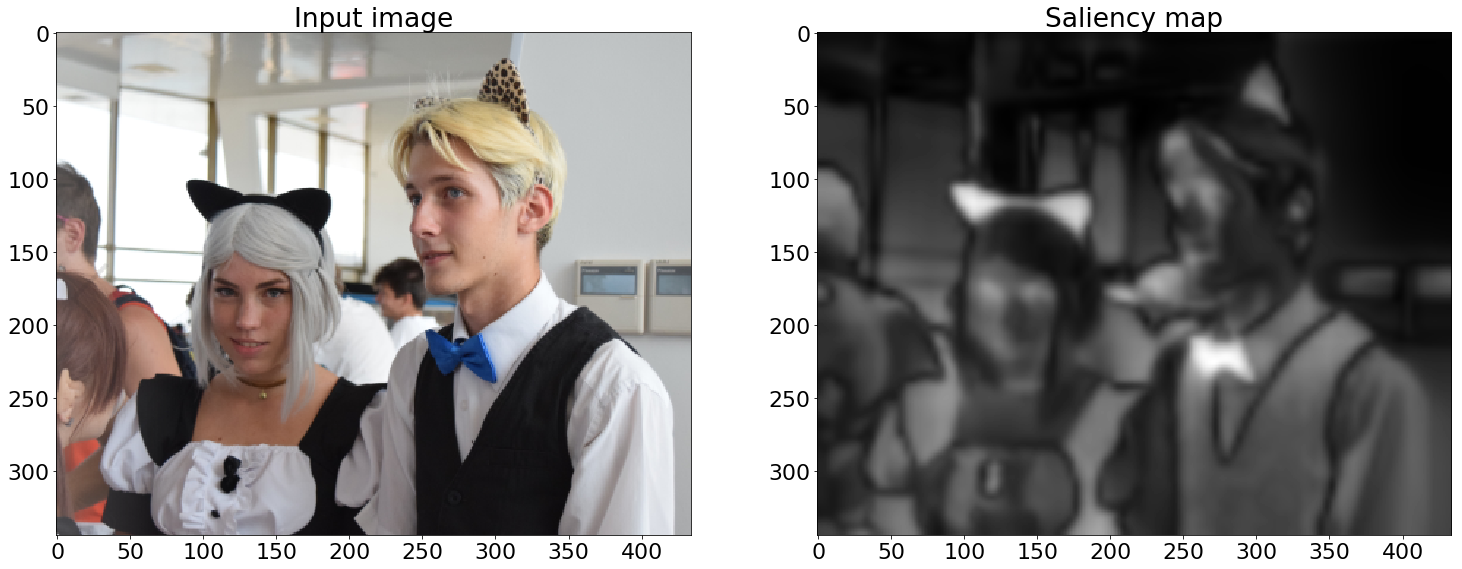

In [5]:
img = cv2.imread('test_imgs/test2.png')
imgsize = img.shape
img_width  = imgsize[1]
img_height = imgsize[0]
sm = pySaliencyMap(img_width, img_height)
# computation
saliency_map = sm.SMGetSM(img)
fig, ax = plt.subplots(1, 2, figsize = (25, 25))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Input image')
ax[1].imshow(saliency_map, 'gray')
ax[1].set_title('Saliency map')